# Ecuación del calor

In [2]:
"""
FEniCS tutorial demo program: Heat equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.

  u'= Laplace(u) + f  in the unit square
  u = u_D             on the boundary
  u = u_0             at t = 0

  u = 1 + x^2 + alpha*y^2 + \beta*t
  f = beta - 2 - 2*alpha
"""

"\nFEniCS tutorial demo program: Heat equation with Dirichlet conditions.\nTest problem is chosen to give an exact solution at all nodes of the mesh.\n\n  u'= Laplace(u) + f  in the unit square\n  u = u_D             on the boundary\n  u = u_0             at t = 0\n\n  u = 1 + x^2 + alpha*y^2 + \x08eta*t\n  f = beta - 2 - 2*alpha\n"

In [3]:
from __future__ import print_function
from fenics import *
import numpy as np

In [4]:
T = 2.0            # final time
num_steps = 10     # number of time steps
dt = T / num_steps # time step size
alpha = 3          # parameter alpha
beta = 1.2         # parameter beta

In [5]:
# Create mesh and define function space
nx = ny = 8
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'P', 1)

In [6]:
# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t',
                 degree=2, alpha=alpha, beta=beta, t=0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

In [7]:
# Define initial value
u_n = interpolate(u_D, V)
#u_n = project(u_D, V)

Para recuperar realmente la solución exacta con precisión de máquina, es importante calcular la condición inicial discreta interpolando $u_0$. Esto asegura que los grados de libertad sean exactos (a la precisión de la máquina) en $t = 0$. La proyección da como resultado valores aproximados en los nodos.

In [8]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(beta - 2 - 2*alpha)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

Solving linear variational problem.
t = 0.20: error = 3.11e-15
Solving linear variational problem.
t = 0.40: error = 2.66e-15
Solving linear variational problem.
t = 0.60: error = 3.55e-15
Solving linear variational problem.
t = 0.80: error = 3.55e-15
Solving linear variational problem.
t = 1.00: error = 3.55e-15
Solving linear variational problem.
t = 1.20: error = 4e-15
Solving linear variational problem.
t = 1.40: error = 4.44e-15
Solving linear variational problem.
t = 1.60: error = 3.55e-15
Solving linear variational problem.
t = 1.80: error = 4.44e-15
Solving linear variational problem.
t = 2.00: error = 4.44e-15


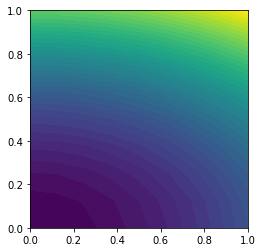

In [11]:
# Time-stepping
u = Function(V)
t = 0
for n in range(num_steps):

    # Update current time
    t += dt
    u_D.t = t

    # Compute solution
    solve(a == L, u, bc)

    # Plot solution
    plot(u)

    # Compute error at vertices
    u_e = interpolate(u_D, V)
    error = np.abs(u_e.vector().get_local() - u.vector().get_local()).max()
    print('t = %.2f: error = %.3g' % (t, error))

    # Update previous solution
    u_n.assign(u)


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solv

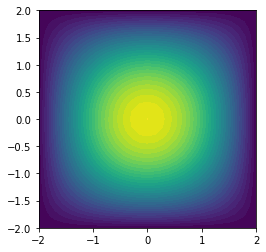

In [12]:
"""
FEniCS tutorial demo program: Diffusion of a Gaussian hill.

  u'= Laplace(u) + f  in a square domain
  u = u_D             on the boundary
  u = u_0             at t = 0

  u_D = f = 0

The initial condition u_0 is chosen as a Gaussian hill.
"""

import time

T = 2.0            # final time
num_steps = 50     # number of time steps
dt = T / num_steps # time step size

# Create mesh and define function space
nx = ny = 30
mesh = RectangleMesh(Point(-2, -2), Point(2, 2), nx, ny)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

# Define initial value
u_0 = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1], 2))',
                 degree=2, a=5)
u_n = interpolate(u_0, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

# Time-stepping
u = Function(V)
t = 0
for n in range(num_steps):

    # Update current time
    t += dt

    # Compute solution
    solve(a == L, u, bc)

    plot(u)

    # Update previous solution
    u_n.assign(u)


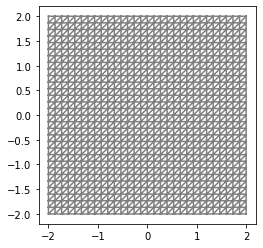

In [13]:
plot(mesh)